In [188]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
import itertools
import math
import json
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from sklearn import metrics
from functools import partial
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import LatentDirichletAllocation

In [3]:
pip install wordcloud

     |████████████████████████████████| 160 kB 16 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


## Word Cloud

In [5]:
filename='wealth_management_10000_tokenized.csv'

In [111]:
data=pd.read_csv(filename,index_col=0)

In [181]:
def word_cloud(vocab):
    dict_={}
    for key,feq in vocab:
        dict_[key]=int(feq)
    plt.figure(figsize=(20,20))
    wordcloud = WordCloud(max_font_size=40, max_words=500,background_color="white").generate_from_frequencies(dict_)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
    return dict_

## Basic description

In [173]:
class ReviewsDataset():
    def __init__(self, **kwargs):
        super(ReviewsDataset, self).__init__(**kwargs)
        # This will be initialised by the load method with all the dataset examples
        self.X = None
        self.X_original = None
        # This will be initialised by the load method with all the dataset classes
        self.y = None 
        
        
#     def preprocess(self, remove_stopwords=False):
#         # avoid tokenization: the input data are already tokenized
#         tfidf = TfidfVectorizer(
#             stop_words="english" if remove_stopwords else None,
#             min_df=2
#         )
        
#         self.X = tfidf.fit_transform(self.X)
        
        
    def load(self, filename,col='text'):
        """
        Loads the dataset from the specified filename. 

        """
        
        print("Loading data from filename {}".format(filename))
        dataset=pd.read_csv(filename,index_col=0)
        #need to specify column name, default is text
        self.X = dataset[col]
        self.X_original= []        
#         self.y = dataset.sentiment
        
    
    def report(self):
        """
        Prints relevant information about the dataset 
        """
        # we assume that both X and Y have been correctly loaded
        if self.X is None:
            raise ValueError("Remember to call 'load' to load the dataset!")
        
        print("Number of training examples %d" % len(self.X))
#         classname=["positive", "negative"]
#         classsize=Counter(self.y)
#         print(classsize)
        
#         %matplotlib inline
#         hist_names = [classname[t] for t in self.y]
#         plt.subplot(4,1,4)
#         plt.hist(hist_names)
#         plt.show()
        

        vocabulary = Counter()
        sum_of_words = 0
        
        for words in self.X:
            sum_of_words += len(words)
        
            vocabulary.update(words)
        print(sum_of_words)
        print("Average sentence length: {} words".format(  
              str(sum_of_words / float(len(self.X)))))
        print("Vobcaulary size: " + str(len(vocabulary)))
        print('top 10 most common words:', vocabulary.most_common(10))
        print('10 least common words:', vocabulary.most_common()[:-11:-1])
        
        fdist1= FreqDist(vocabulary)
        for key in fdist1:
            fdist1[key]=math.log(fdist1[key])
        %matplotlib inline
        plt.subplot(4,1,1)
        fdist1.plot(50)
       
        frequence_ratio=[]
        log_rank=[]
        log_frequence=[]
        vocab1 = sorted(vocabulary.items(), key=lambda d:d[1], reverse = True)
        
        for index in range(0,len(vocab1)):
            log_rank.append(math.log(index+1))
            frequence_ratio.append(vocab1[index][1]*(index+1))
            log_frequence.append(math.log(vocab1[index][1]))
        print("the mean of frequence ratio: ",np.mean(frequence_ratio))
        print("the std of frequence ratio: ",np.std(frequence_ratio))
        %matplotlib inline
        plt.subplot(4,1,2)
        plt.plot(np.array(log_rank),np.array(log_frequence))
        plt.title('log(rank) vs log(frequence)')
        plt.xlabel('log(rank)')
        plt.ylabel('log(frequence)')
        plt.show()
        %matplotlib inline
        plt.subplot(4,1,3)
        plt.plot(frequence_ratio)
        plt.title('Plot of frequence ratio') # this should be constant
        plt.show()
        
        return vocab1
      

In [174]:
review=ReviewsDataset()

In [175]:
review.load(filename)

Loading data from filename wealth_management_10000_tokenized.csv


Number of training examples 4392
888489
Average sentence length: 202.297131147541 words
Vobcaulary size: 329
top 10 most common words: [("'", 170811), (',', 84222), (' ', 81424), ('e', 58826), ('a', 45008), ('n', 42692), ('t', 39711), ('i', 35405), ('r', 25367), ('s', 25111)]
10 least common words: [('►', 1), ('।', 1), ('ै', 1), ('औ', 1), ('ू', 1), ('ज', 1), ('ฏ', 1), ('ธ', 1), ('ญ', 1), ('ถ', 1)]


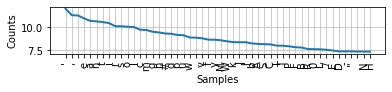

the mean of frequence ratio:  29022.729483282674
the std of frequence ratio:  60987.258137279074


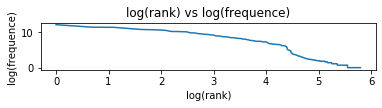

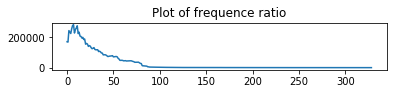

In [176]:
vocab=review.report()
    

In [182]:
vocab

[("'", 170811),
 (',', 84222),
 (' ', 81424),
 ('e', 58826),
 ('a', 45008),
 ('n', 42692),
 ('t', 39711),
 ('i', 35405),
 ('r', 25367),
 ('s', 25111),
 ('o', 23787),
 ('l', 23000),
 ('c', 17267),
 ('m', 16703),
 ('g', 13849),
 ('h', 12867),
 ('#', 11481),
 ('d', 11105),
 ('p', 9758),
 ('u', 9433),
 ('w', 7361),
 ('.', 7262),
 ('v', 6761),
 ('f', 5836),
 ('y', 5804),
 ('M', 5463),
 ('W', 4868),
 ('k', 4465),
 (']', 4411),
 ('[', 4409),
 ('b', 3879),
 ('A', 3680),
 ('S', 3565),
 ('C', 3478),
 ('I', 3038),
 ('T', 3011),
 ('P', 2826),
 ('F', 2550),
 ('B', 2469),
 ('R', 2112),
 ('0', 2069),
 ('L', 2033),
 ('/', 1932),
 ('E', 1786),
 ('D', 1630),
 ('-', 1629),
 ('"', 1625),
 ('…', 1599),
 ('N', 1594),
 ('H', 1578),
 ('2', 1393),
 ('G', 1392),
 ('1', 1379),
 ('O', 1365),
 ('x', 1304),
 (':', 1108),
 ('U', 1002),
 ('J', 830),
 ('$', 824),
 ('9', 811),
 ('V', 783),
 ('z', 727),
 ('5', 723),
 ('Y', 722),
 ('3', 678),
 ('q', 670),
 ('4', 663),
 ('!', 661),
 ('8', 656),
 ('j', 652),
 ('K', 610),
 

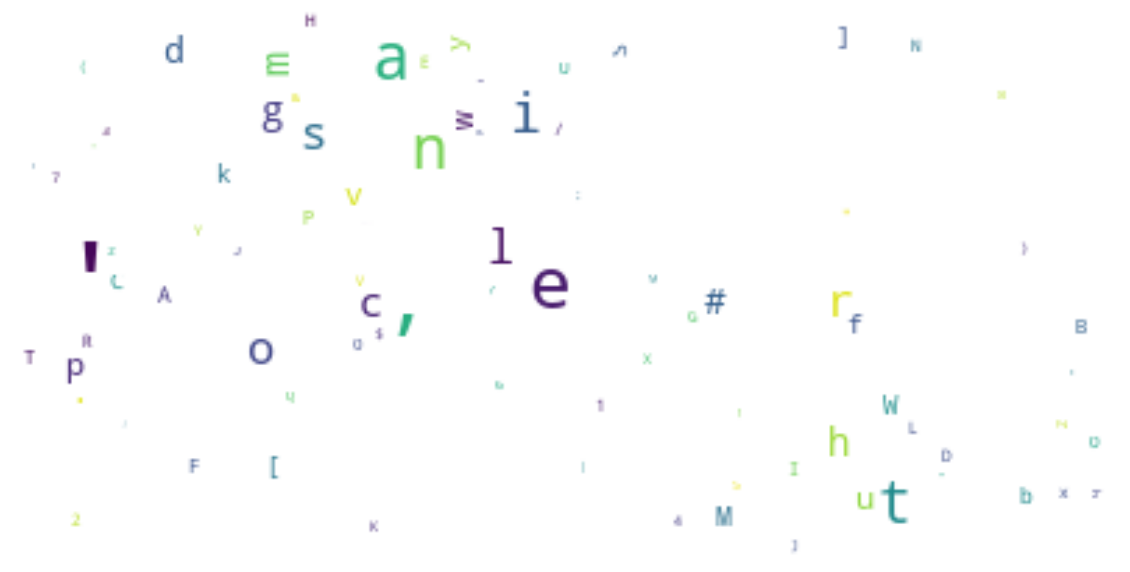

{"'": 170811,
 ',': 84222,
 ' ': 81424,
 'e': 58826,
 'a': 45008,
 'n': 42692,
 't': 39711,
 'i': 35405,
 'r': 25367,
 's': 25111,
 'o': 23787,
 'l': 23000,
 'c': 17267,
 'm': 16703,
 'g': 13849,
 'h': 12867,
 '#': 11481,
 'd': 11105,
 'p': 9758,
 'u': 9433,
 'w': 7361,
 '.': 7262,
 'v': 6761,
 'f': 5836,
 'y': 5804,
 'M': 5463,
 'W': 4868,
 'k': 4465,
 ']': 4411,
 '[': 4409,
 'b': 3879,
 'A': 3680,
 'S': 3565,
 'C': 3478,
 'I': 3038,
 'T': 3011,
 'P': 2826,
 'F': 2550,
 'B': 2469,
 'R': 2112,
 '0': 2069,
 'L': 2033,
 '/': 1932,
 'E': 1786,
 'D': 1630,
 '-': 1629,
 '"': 1625,
 '…': 1599,
 'N': 1594,
 'H': 1578,
 '2': 1393,
 'G': 1392,
 '1': 1379,
 'O': 1365,
 'x': 1304,
 ':': 1108,
 'U': 1002,
 'J': 830,
 '$': 824,
 '9': 811,
 'V': 783,
 'z': 727,
 '5': 723,
 'Y': 722,
 '3': 678,
 'q': 670,
 '4': 663,
 '!': 661,
 '8': 656,
 'j': 652,
 'K': 610,
 '6': 573,
 '7': 541,
 ')': 482,
 '(': 477,
 'X': 477,
 '?': 467,
 '’': 464,
 '&': 408,
 'Q': 354,
 'Z': 338,
 ';': 159,
 '%': 150,
 '|': 140,


In [183]:
word_cloud(vocab)

## Topic Modeling

In [184]:
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

In [186]:
lemm = WordNetLemmatizer()
class LemmaCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaCountVectorizer, self).build_analyzer()
        return lambda doc: (lemm.lemmatize(w) for w in analyzer(doc))
    
# Storing the entire training text in a list
text = list(review.X)
# Calling our overwritten Count vectorizer
tf_vectorizer = LemmaCountVectorizer(max_df=0.95, 
                                     min_df=2,
                                     stop_words='english',
                                     decode_error='ignore')
tf = tf_vectorizer.fit_transform(text)

In [189]:
## try lda
n_components=11
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 0)

lda.fit(tf)

n_top_words = 40
print("\nTopics in LDA model: ")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model: 

Topic #0:wealthmanagement blockchain gold crypto bitcoin platform cryptocurrency digital wealth mpcxp ai trading china privateequity hnwi currency parent mpcx silver banking hedgefund invest token hnw entertainment forex btc era 200 rush reshaped stage institutional sumnicht force lending venturecapital inside payment warren

Topic #1:2019 wealthmanagement investing la investment 11 day el outlook special en del baltimore il familyoffice 10 investconfex le record realestate 14 conference 25 di development assetmanagement evaluation investingfundamentals e programme houston wealthcreation nel 00 cfa realtor bper source que al

Topic #2:wealth management com twitter wealthmanagement pic firm financial investment client investing new business fintech bank service advisor finance banking financialplanning help private team year need market advice digital read learn technology today financialservices investor industry manager global join plan morgan

Topic #3:managem

#### Word cloud for each topic:

In [190]:
def word_cloud_sub(num,tf_feature_names=tf_feature_names):
    topic=lda.components_[num]
    topic_words = [tf_feature_names[i] for i in topic.argsort()[:-50 - 1 :-1]]
    cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(topic_words))
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()


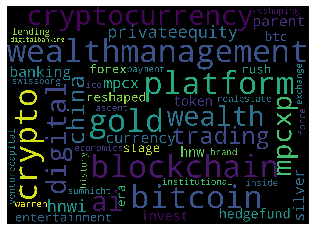

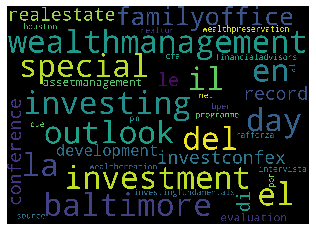

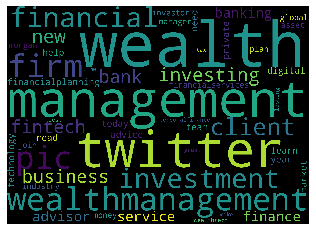

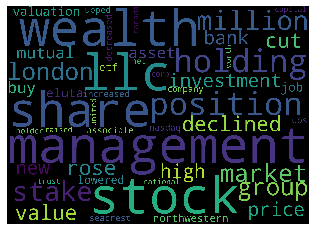

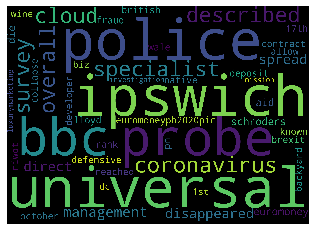

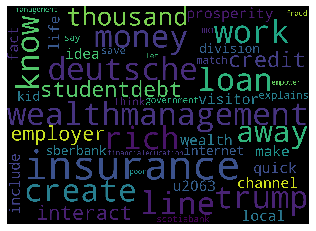

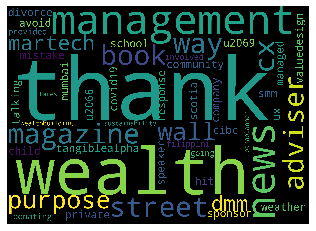

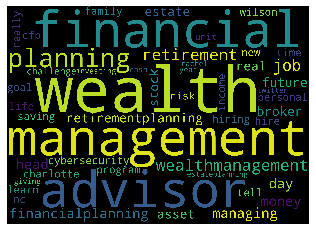

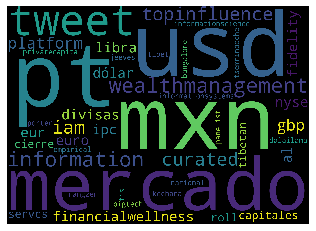

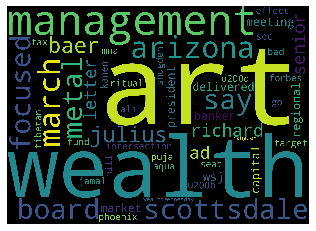

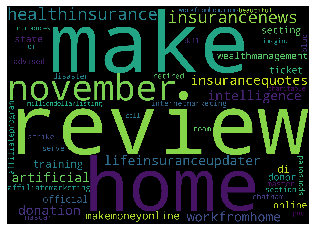

In [191]:
for num in range(n_components):
    word_cloud_sub(num)